# Identification d'objets à partir de photos - jeu de données CIFAR-10
## Labo réseau convolutif

#### Inspiration: 


## Jeu de données - photos CIFAR-10
L'ensemble de données CIFAR-10 (Canadian Institute For Advanced Research) comporte 60 000 photographies en couleur de 32×32 pixels d'objets de 10 classes différentes. Il est relativement simple d'atteindre une précision de 80 %. On peut obtenir des performances de 90 % avec ces données avec des réseaux neuronaux convolutifs. 

* 0 : avion
* 1 : automobile
* 2 : oiseau
* 3 : chat
* 4 : cerfs
* 5 : chien
* 6 : grenouille
* 7 : cheval
* 8 : bateau
* 9 : camion


TensorFlow version: 2.4.1
Keras version: 2.4.3

Entraînement: attributs=(50000, 32, 32, 3), étiquettes=(50000, 1)
Test: attributs=(10000, 32, 32, 3), étiquettes=(10000, 1)

Quelques images avec leur étiquette...


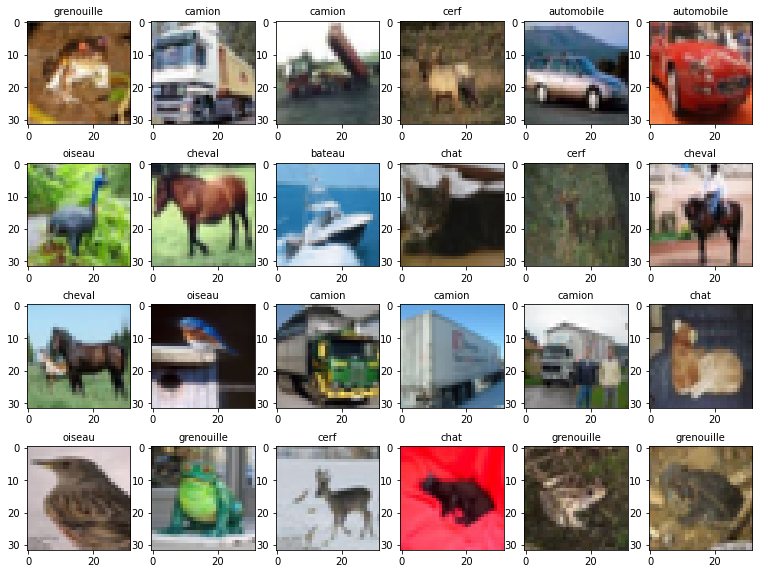

In [1]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf
print("TensorFlow version:",tf.__version__)
import keras
print("Keras version:",keras.__version__)

# le jeu de données CIFAR-10
from keras.datasets import cifar10

dic_noms_etiquette = { 
    0 : "avion",
    1 : "automobile",
    2 : "oiseau",
    3 : "chat",
    4 : "cerf",
    5 : "chien",
    6 : "grenouille",
    7 : "cheval",
    8 : "bateau",
    9 : "camion",
}

# lire le jeu de données CIFAR-10 et le diviser entre
# les données d'entrainement et les données de test
(attributs_entrainement, etiquettes_cibles_entrainement), (attributs_test, etiquettes_cibles_test) = cifar10.load_data()

# summarize loaded dataset
print()
print('Entraînement: attributs=%s, étiquettes=%s' % (attributs_entrainement.shape, etiquettes_cibles_entrainement.shape))
print('Test: attributs=%s, étiquettes=%s' % (attributs_test.shape, etiquettes_cibles_test.shape))

# Afficher les 24 premières images
print()
print("Quelques images avec leur étiquette...")
%matplotlib inline
# définir subplot
fig, axes = plt.subplots(nrows=4,ncols=6,figsize=(10,8))
for i_rangee in range(0,4):
    for i_colonne in range(0,6):
        axes[i_rangee,i_colonne].set_title(dic_noms_etiquette[int(etiquettes_cibles_entrainement[i_rangee*6+i_colonne])],
                                           fontsize=10)
        axes[i_rangee,i_colonne].imshow(attributs_entrainement[i_rangee*6+i_colonne])
plt.show()

In [2]:
# Conversion des étiquettes-cibles en vecteurs binaires à un bit discriminant
from keras.utils import to_categorical

etiquettes_cibles_entrainement = to_categorical(etiquettes_cibles_entrainement)
etiquettes_cibles_test = to_categorical(etiquettes_cibles_test)

# Normalisation

def normalisation(entrainement, test):
    # convertir de nombres entiers à nombres décimaux
    entrainement_normalise = entrainement.astype('float32')
    test_normalise = test.astype('float32')
    # normalisation à un nombre entre 0 et 1
    entrainement_normalise = entrainement_normalise / 255.0
    test_normalise = test_normalise / 255.0
    return entrainement_normalise, test_normalise

attributs_entrainement, attributs_test = normalisation(attributs_entrainement, attributs_test)

print("Normalisation terminée!")

Normalisation terminée!


## Modèle de base

In [3]:
# Construction du modèle

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

print("Création d'un modèle de base...")

input_shape = (32, 32, 3)
batch_size = 32
# ou nombre de classes
nombre_etiquettes_cibles = 10

modele_de_base = Sequential()
# Apprentissage et extraction des attributs
modele_de_base.add(Conv2D(32, 
                         kernel_size=(3,3), 
                         activation='relu', 
                         kernel_initializer='he_uniform',
                         padding='same',
                         strides=(1,1),
                         input_shape=input_shape))
modele_de_base.add(MaxPooling2D(pool_size=(2,2)))

# Classification des images
modele_de_base.add(Flatten())
modele_de_base.add(Dense(128, 
                         activation='relu', 
                         kernel_initializer='he_uniform'))
modele_de_base.add(Dense(nombre_etiquettes_cibles, 
                         activation='softmax'))

print()
print("Description du modèle de base:")
modele_de_base.summary()

Création d'un modèle de base...

Description du modèle de base:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,050,890
Trainable params: 1,050,890
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Compilation du modèle

print()
print("Compilation du modèle de base...")

modele_de_base.compile(loss="categorical_crossentropy", 
                       optimizer="adam", 
                       metrics=["accuracy"])


Compilation du modèle de base...


In [5]:
# Entraînement du modèle

print()
print("Entraînement du modèle de base...")

batch_size = 128
epochs = 15

traces_entrainement = modele_de_base.fit(attributs_entrainement,
                                         etiquettes_cibles_entrainement,
                                         batch_size=batch_size,
                                         epochs=epochs,
                                         validation_split=0.1)


Entraînement du modèle de base...
Epoch 1/15
352/352 [==============================] - 28s 75ms/step - loss: 2.2124 - accuracy: 0.3093 - val_loss: 1.3912 - val_accuracy: 0.5094
Epoch 2/15
352/352 [==============================] - 30s 86ms/step - loss: 1.3446 - accuracy: 0.5263 - val_loss: 1.2538 - val_accuracy: 0.5646
Epoch 3/15
352/352 [==============================] - 39s 112ms/step - loss: 1.2151 - accuracy: 0.5741 - val_loss: 1.1718 - val_accuracy: 0.5970
Epoch 4/15
352/352 [==============================] - 32s 92ms/step - loss: 1.1262 - accuracy: 0.6056 - val_loss: 1.1413 - val_accuracy: 0.6016
Epoch 5/15
352/352 [==============================] - 31s 89ms/step - loss: 1.0665 - accuracy: 0.6304 - val_loss: 1.1157 - val_accuracy: 0.6134
Epoch 6/15
352/352 [==============================] - 29s 81ms/step - loss: 1.0167 - accuracy: 0.6431 - val_loss: 1.0889 - val_accuracy: 0.6222
Epoch 7/15
352/352 [==============================] - 28s 78ms/step - loss: 0.9721 - accuracy: 0.663

In [6]:
# Évaluation du modèle

print()
print("Évaluation du modèle de base...")

resultats = modele_de_base.evaluate(attributs_test, etiquettes_cibles_test, verbose=0)
print("Exactitude test: {:.2f}%".format(resultats[1]*100))


Évaluation du modèle de base...
Exactitude test: 62.82%


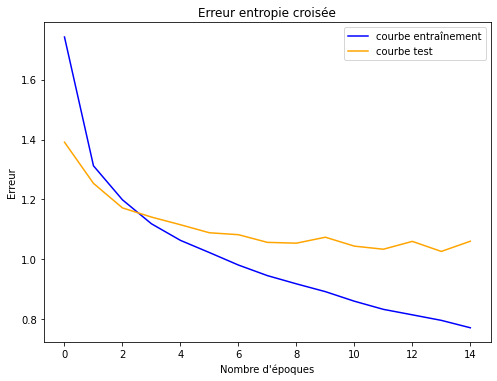

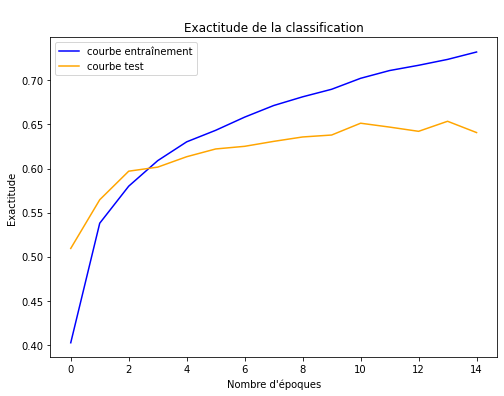

In [7]:
# Affichage des courbes d'entraînement
hauteur = 8
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe test')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe test')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + ✬_plot.png✬)
# pyplot.close()

## Modèle 2 fois plus profond

In [8]:
# Construction du modèle

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

print("Création d'un modèle 2 fois plus profond...")

input_shape = (32, 32, 3)
batch_size = 32
# ou nombre de classes
nombre_etiquettes_cibles = 10

modele_2X_plus_profond = Sequential()
# Apprentissage et extraction des attributs
modele_2X_plus_profond.add(Conv2D(32, 
                         kernel_size=(3,3), 
                         activation='relu', 
                         kernel_initializer='he_uniform',
                         padding='same',
                         strides=(1,1),
                         input_shape=input_shape))
modele_2X_plus_profond.add(MaxPooling2D(pool_size=(2,2)))
modele_2X_plus_profond.add(Conv2D(64,
                          kernel_size=(3,3), 
                          activation='relu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_2X_plus_profond.add(MaxPooling2D(pool_size=(2,2)))

# Classification des images
modele_2X_plus_profond.add(Flatten())
modele_2X_plus_profond.add(Dense(128, 
                         activation='relu', 
                         kernel_initializer='he_uniform'))
modele_2X_plus_profond.add(Dense(nombre_etiquettes_cibles, 
                         activation='softmax'))

print()
print("Description du modèle 2 fois plus profond:")
modele_2X_plus_profond.summary()

Création d'un modèle 2 fois plus profond...

Description du modèle 2 fois plus profond:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               524416    
________________________________

In [9]:
# Compilation du modèle

print()
print("Compilation du modèle 2 fois plus profond...")

modele_2X_plus_profond.compile(loss="categorical_crossentropy", 
                       optimizer="adam", 
                       metrics=["accuracy"])


Compilation du modèle 2 fois plus profond...


In [10]:
# Entraînement du modèle

print()
print("Entraînement du modèle 2 fois plus profond...")

batch_size = 128
epochs = 15

traces_entrainement = modele_2X_plus_profond.fit(attributs_entrainement,
                                                 etiquettes_cibles_entrainement,
                                                 batch_size=batch_size,
                                                 epochs=epochs,
                                                 validation_split=0.1)


Entraînement du modèle 2 fois plus profond...
Epoch 1/15
352/352 [==============================] - 67s 188ms/step - loss: 1.7842 - accuracy: 0.3616 - val_loss: 1.1739 - val_accuracy: 0.5906
Epoch 2/15
352/352 [==============================] - 61s 173ms/step - loss: 1.1123 - accuracy: 0.6148 - val_loss: 1.0620 - val_accuracy: 0.6264
Epoch 3/15
352/352 [==============================] - 62s 175ms/step - loss: 0.9516 - accuracy: 0.6690 - val_loss: 0.9547 - val_accuracy: 0.6698
Epoch 4/15
352/352 [==============================] - 85s 243ms/step - loss: 0.8527 - accuracy: 0.7061 - val_loss: 0.9011 - val_accuracy: 0.6978
Epoch 5/15
352/352 [==============================] - 86s 244ms/step - loss: 0.7661 - accuracy: 0.7343 - val_loss: 0.9149 - val_accuracy: 0.6968
Epoch 6/15
352/352 [==============================] - 72s 203ms/step - loss: 0.7052 - accuracy: 0.7565 - val_loss: 0.9025 - val_accuracy: 0.6988
Epoch 7/15
352/352 [==============================] - 58s 164ms/step - loss: 0.6367

In [11]:
# Évaluation du modèle

print()
print("Évaluation du modèle 2 fois plus profond...")

resultats = modele_2X_plus_profond.evaluate(attributs_test, etiquettes_cibles_test, verbose=0)
print("Exactitude test: {:.2f}%".format(resultats[1]*100))


Évaluation du modèle 2 fois plus profond...
Exactitude test: 70.21%


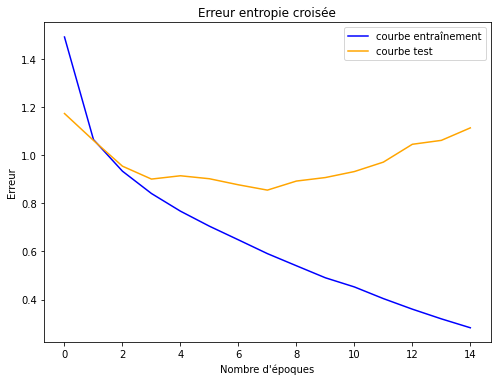

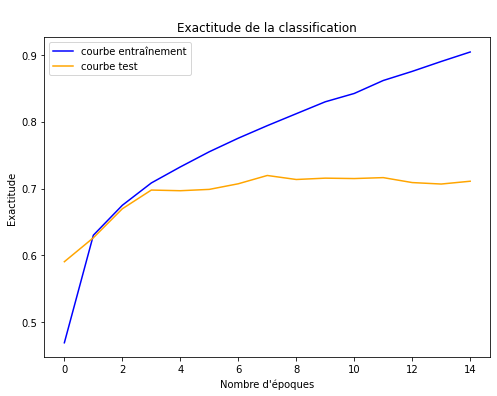

In [12]:
# Affichage des courbes d'entraînement
hauteur = 8
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe test')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe test')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + ✬_plot.png✬)
# pyplot.close()

## Modèle 3 fois plus profond

In [13]:
# Construction du modèle

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

print("Création du modèle 3 fois plus profond...")

input_shape = (32, 32, 3)
batch_size = 32
# ou nombre de classes
nombre_etiquettes_cibles = 10

modele_3X_plus_profond = Sequential()
# Apprentissage et extraction des attributs
modele_3X_plus_profond.add(Conv2D(32, 
                         kernel_size=(3,3), 
                         activation='relu', 
                         kernel_initializer='he_uniform',
                         padding='same',
                         strides=(1,1),
                         input_shape=input_shape))
modele_3X_plus_profond.add(MaxPooling2D(pool_size=(2,2)))

modele_3X_plus_profond.add(Conv2D(64,
                          kernel_size=(3,3), 
                          activation='relu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_3X_plus_profond.add(MaxPooling2D(pool_size=(2,2)))

modele_3X_plus_profond.add(Conv2D(128,
                          kernel_size=(3,3), 
                          activation='relu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_3X_plus_profond.add(MaxPooling2D(pool_size=(2,2)))

# Classification des images
modele_3X_plus_profond.add(Flatten())
modele_3X_plus_profond.add(Dense(128, 
                         activation='relu', 
                         kernel_initializer='he_uniform'))
modele_3X_plus_profond.add(Dense(nombre_etiquettes_cibles, 
                         activation='softmax'))

print()
print("Description du modèle 3 fois plus profond:")
modele_3X_plus_profond.summary()

Création du modèle 3 fois plus profond...

Description du modèle 3 fois plus profond:
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
__________________________________

In [14]:
# Compilation du modèle

print()
print("Compilation du modèle 3 fois plus profond...")

modele_3X_plus_profond.compile(loss="categorical_crossentropy", 
                       optimizer="adam", 
                       metrics=["accuracy"])


Compilation du modèle 3 fois plus profond...


In [15]:
# Entraînement du modèle

print()
print("Entraînement du modèle 3 fois plus profond...")

batch_size = 128
epochs = 15

traces_entrainement = modele_3X_plus_profond.fit(attributs_entrainement,
                                                 etiquettes_cibles_entrainement,
                                                 batch_size=batch_size,
                                                 epochs=epochs,
                                                 validation_split=0.1)


Entraînement du modèle 3 fois plus profond...
Epoch 1/15
352/352 [==============================] - 88s 247ms/step - loss: 1.7598 - accuracy: 0.3677 - val_loss: 1.2292 - val_accuracy: 0.5566
Epoch 2/15
352/352 [==============================] - 72s 203ms/step - loss: 1.1198 - accuracy: 0.6030 - val_loss: 0.9646 - val_accuracy: 0.6686
Epoch 3/15
352/352 [==============================] - 84s 239ms/step - loss: 0.9428 - accuracy: 0.6706 - val_loss: 0.9843 - val_accuracy: 0.6578
Epoch 4/15
352/352 [==============================] - 96s 272ms/step - loss: 0.8133 - accuracy: 0.7179 - val_loss: 0.8636 - val_accuracy: 0.7058
Epoch 5/15
352/352 [==============================] - 110s 313ms/step - loss: 0.7002 - accuracy: 0.7566 - val_loss: 0.8001 - val_accuracy: 0.7348
Epoch 6/15
352/352 [==============================] - 110s 311ms/step - loss: 0.6256 - accuracy: 0.7837 - val_loss: 0.8415 - val_accuracy: 0.7178
Epoch 7/15
352/352 [==============================] - 173s 492ms/step - loss: 0.5

In [16]:
# Évaluation du modèle

print()
print("Évaluation du modèle 3 fois plus profond...")

resultats = modele_3X_plus_profond.evaluate(attributs_test, etiquettes_cibles_test, verbose=0)
print("Exactitude test: {:.2f}%".format(resultats[1]*100))


Évaluation du modèle 3 fois plus profond...
Exactitude test: 72.02%


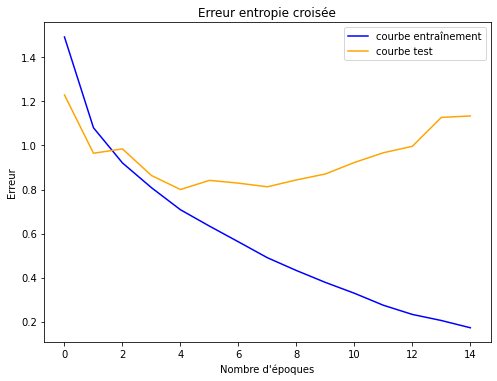

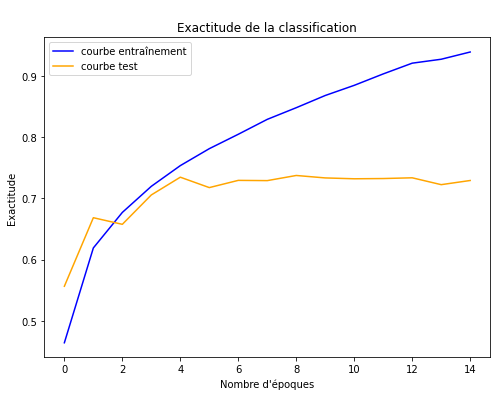

In [17]:
# Affichage des courbes d'entraînement
hauteur = 8
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe test')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe test')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + ✬_plot.png✬)
# pyplot.close()

## Modèle 4 fois plus profond

In [18]:
# Construction du modèle

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

print("Création du modèle 4 fois plus profond...")

input_shape = (32, 32, 3)
batch_size = 32
# ou nombre de classes
nombre_etiquettes_cibles = 10

modele_4X_plus_profond = Sequential()
# Apprentissage et extraction des attributs
modele_4X_plus_profond.add(Conv2D(32, 
                         kernel_size=(3,3), 
                         activation='relu', 
                         kernel_initializer='he_uniform',
                         padding='same',
                         strides=(1,1),
                         input_shape=input_shape))
modele_4X_plus_profond.add(MaxPooling2D(pool_size=(2,2)))

modele_4X_plus_profond.add(Conv2D(64,
                          kernel_size=(3,3), 
                          activation='relu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_4X_plus_profond.add(MaxPooling2D(pool_size=(2,2)))

modele_4X_plus_profond.add(Conv2D(128,
                          kernel_size=(3,3), 
                          activation='relu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_4X_plus_profond.add(MaxPooling2D(pool_size=(2,2)))

modele_4X_plus_profond.add(Conv2D(256,
                          kernel_size=(3,3), 
                          activation='relu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_4X_plus_profond.add(MaxPooling2D(pool_size=(2,2)))

# Classification des images
modele_4X_plus_profond.add(Flatten())
modele_4X_plus_profond.add(Dense(128, 
                         activation='relu', 
                         kernel_initializer='he_uniform'))
modele_4X_plus_profond.add(Dense(nombre_etiquettes_cibles, 
                         activation='softmax'))

print()
print("Description du modèle 4 fois plus profond:")
modele_4X_plus_profond.summary()

Création du modèle 4 fois plus profond...

Description du modèle 4 fois plus profond:
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
__________________________________

In [19]:
# Compilation du modèle

print()
print("Compilation du modèle 4 fois plus profond...")

modele_4X_plus_profond.compile(loss="categorical_crossentropy", 
                       optimizer="adam", 
                       metrics=["accuracy"])


Compilation du modèle 4 fois plus profond...


In [20]:
# Entraînement du modèle

print()
print("Entraînement du modèle 4 fois plus profond...")

batch_size = 128
epochs = 15

traces_entrainement = modele_4X_plus_profond.fit(attributs_entrainement,
                                                 etiquettes_cibles_entrainement,
                                                 batch_size=batch_size,
                                                 epochs=epochs,
                                                 validation_split=0.1)


Entraînement du modèle 4 fois plus profond...
Epoch 1/15
352/352 [==============================] - 101s 284ms/step - loss: 1.8166 - accuracy: 0.3439 - val_loss: 1.2421 - val_accuracy: 0.5630
Epoch 2/15
352/352 [==============================] - 107s 305ms/step - loss: 1.0919 - accuracy: 0.6137 - val_loss: 0.9778 - val_accuracy: 0.6662
Epoch 3/15
352/352 [==============================] - 101s 287ms/step - loss: 0.8832 - accuracy: 0.6917 - val_loss: 0.8664 - val_accuracy: 0.6980
Epoch 4/15
352/352 [==============================] - 102s 289ms/step - loss: 0.7233 - accuracy: 0.7462 - val_loss: 0.8113 - val_accuracy: 0.7258
Epoch 5/15
352/352 [==============================] - 102s 289ms/step - loss: 0.5906 - accuracy: 0.7945 - val_loss: 0.8190 - val_accuracy: 0.7290
Epoch 6/15
352/352 [==============================] - 102s 289ms/step - loss: 0.4871 - accuracy: 0.8294 - val_loss: 0.8351 - val_accuracy: 0.7372
Epoch 7/15
352/352 [==============================] - 105s 298ms/step - loss:

In [21]:
# Évaluation du modèle

print()
print("Évaluation du modèle 4 fois plus profond...")

resultats = modele_4X_plus_profond.evaluate(attributs_test, etiquettes_cibles_test, verbose=0)
print("Exactitude test: {:.2f}%".format(resultats[1]*100))


Évaluation du modèle 4 fois plus profond...
Exactitude test: 71.74%


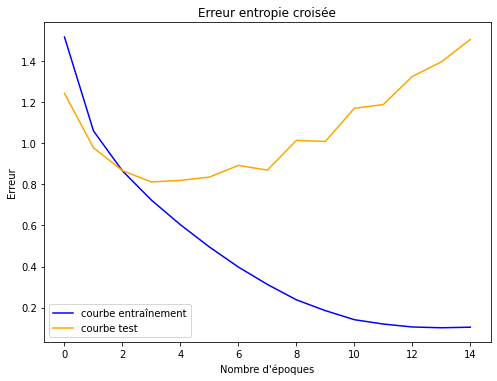

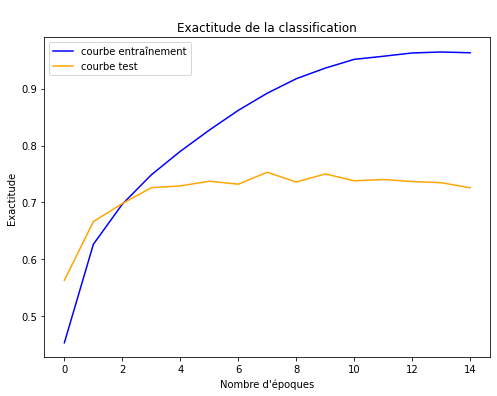

In [22]:
# Affichage des courbes d'entraînement
hauteur = 8
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe test')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe test')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + ✬_plot.png✬)
# pyplot.close()

## Modèle 3 fois plus profond régularisé

In [23]:
# Construction d'un modèle de base

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

print("Création du modèle 3 fois plus profond régularisé...")

input_shape = (32, 32, 3)
batch_size = 32
# ou nombre de classes
nombre_etiquettes_cibles = 10

modele_3X_plus_profond_regularise = Sequential()

# Apprentissage et extraction des attributs
modele_3X_plus_profond_regularise.add(Conv2D(32, 
                         kernel_size=(3,3), 
                         activation='relu', 
                         kernel_initializer='he_uniform',
                         padding='same',
                         strides=(1,1),
                         input_shape=input_shape))
modele_3X_plus_profond_regularise.add(MaxPooling2D(pool_size=(2,2)))
modele_3X_plus_profond_regularise.add(Dropout(0.2))

modele_3X_plus_profond_regularise.add(Conv2D(64,
                          kernel_size=(3,3), 
                          activation='relu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_3X_plus_profond_regularise.add(MaxPooling2D(pool_size=(2,2)))
modele_3X_plus_profond_regularise.add(Dropout(0.2))

modele_3X_plus_profond_regularise.add(Conv2D(128,
                          kernel_size=(3,3), 
                          activation='relu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_3X_plus_profond_regularise.add(MaxPooling2D(pool_size=(2,2)))
modele_3X_plus_profond_regularise.add(Dropout(0.2))

# Classification des images
modele_3X_plus_profond_regularise.add(Flatten())
modele_3X_plus_profond_regularise.add(Dense(128, 
                         activation='relu', 
                         kernel_initializer='he_uniform'))
modele_3X_plus_profond_regularise.add(Dense(nombre_etiquettes_cibles, 
                         activation='softmax'))

print()
print("Description du modèle 3 fois plus profond régularisé:")
modele_3X_plus_profond_regularise.summary()

Création du modèle 3 fois plus profond régularisé...

Description du modèle 3 fois plus profond régularisé:
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
____________

In [24]:
# Compilation du modèle

print()
print("Compilation du modèle 3 fois plus profond régularisé...")

modele_3X_plus_profond_regularise.compile(loss="categorical_crossentropy", 
                       optimizer="adam", 
                       metrics=["accuracy"])


Compilation du modèle 3 fois plus profond régularisé...


In [25]:
# Entraînement du modèle

print()
print("Entraînement du modèle 3 fois plus profond régularisé...")

batch_size = 128
epochs = 15

traces_entrainement = modele_3X_plus_profond_regularise.fit(attributs_entrainement,
                                                            etiquettes_cibles_entrainement,
                                                            batch_size=batch_size,
                                                            epochs=epochs,
                                                            validation_split=0.1)


Entraînement du modèle 3 fois plus profond régularisé...
Epoch 1/15
352/352 [==============================] - 105s 295ms/step - loss: 2.2882 - accuracy: 0.2211 - val_loss: 1.5708 - val_accuracy: 0.4272
Epoch 2/15
352/352 [==============================] - 111s 316ms/step - loss: 1.4802 - accuracy: 0.4622 - val_loss: 1.2808 - val_accuracy: 0.5484
Epoch 3/15
352/352 [==============================] - 118s 335ms/step - loss: 1.2680 - accuracy: 0.5470 - val_loss: 1.0957 - val_accuracy: 0.6148
Epoch 4/15
352/352 [==============================] - 103s 293ms/step - loss: 1.1367 - accuracy: 0.5978 - val_loss: 1.0206 - val_accuracy: 0.6448
Epoch 5/15
352/352 [==============================] - 85s 243ms/step - loss: 1.0348 - accuracy: 0.6331 - val_loss: 0.9222 - val_accuracy: 0.6830
Epoch 6/15
352/352 [==============================] - 84s 239ms/step - loss: 0.9528 - accuracy: 0.6632 - val_loss: 0.8597 - val_accuracy: 0.6988
Epoch 7/15
352/352 [==============================] - 87s 246ms/step

In [26]:
# Évaluation du modèle
print()
print("Évaluation du modèle 3 fois plus profond régularisé...")

resultats = modele_3X_plus_profond_regularise.evaluate(attributs_test, etiquettes_cibles_test, verbose=0)
print("Exactitude test: {:.2f}%".format(resultats[1]*100))


Évaluation du modèle 3 fois plus profond régularisé...
Exactitude test: 75.38%


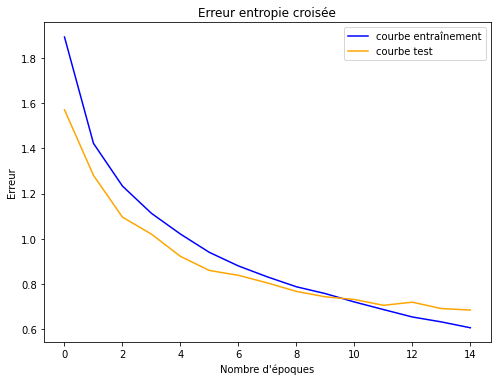

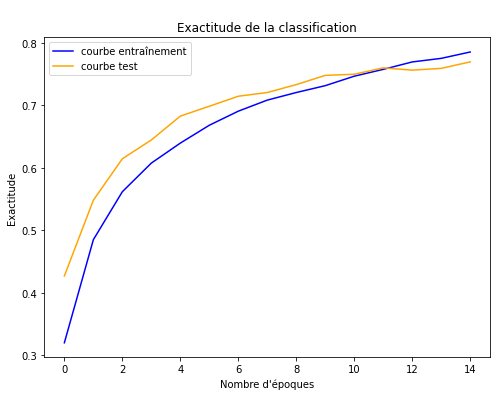

In [27]:
# Affichage des courbes d'entraînement
hauteur = 8
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe test')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe test')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + ✬_plot.png✬)
# pyplot.close()

## Modèle 3 fois plus profond régularisé (L2 + extinction)


In [28]:
# Construction d'un modèle de base

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

print("Création du modèle 3 fois plus profond régularisé (L2 + extinction)...")

input_shape = (32, 32, 3)
batch_size = 32
# ou nombre de classes
nombre_etiquettes_cibles = 10

modele_3Xplus_profond_regL2Xtn = Sequential()

# Apprentissage et extraction des attributs
modele_3Xplus_profond_regL2Xtn.add(Conv2D(32, 
                         kernel_size=(3,3), 
                         activation='elu', 
                         kernel_initializer='he_uniform',
                         kernel_regularizer=regularizers.l2(diminution_poids),
                         padding='same',
                         strides=(1,1),
                         input_shape=input_shape))
modele_3Xplus_profond_regL2Xtn.add(MaxPooling2D(pool_size=(2,2)))
modele_3Xplus_profond_regL2Xtn.add(Dropout(0.2))

modele_3Xplus_profond_regL2Xtn.add(Conv2D(64,
                          kernel_size=(3,3), 
                          activation='elu', 
                          kernel_initializer='he_uniform',
                          kernel_regularizer=regularizers.l2(diminution_poids),
                          padding='same',
                          strides=(1,1),))
modele_3Xplus_profond_regL2Xtn.add(MaxPooling2D(pool_size=(2,2)))
modele_3Xplus_profond_regL2Xtn.add(Dropout(0.2))

modele_3Xplus_profond_regL2Xtn.add(Conv2D(128,
                          kernel_size=(3,3), 
                          activation='elu', 
                          kernel_initializer='he_uniform',
                          kernel_regularizer=regularizers.l2(diminution_poids),
                          padding='same',
                          strides=(1,1),))
modele_3Xplus_profond_regL2Xtn.add(MaxPooling2D(pool_size=(2,2)))
modele_3Xplus_profond_regL2Xtn.add(Dropout(0.2))

# Classification des images
modele_3Xplus_profond_regL2Xtn.add(Flatten())
modele_3Xplus_profond_regL2Xtn.add(Dense(128, 
                         activation='elu', 
                         kernel_initializer='he_uniform'))
modele_3Xplus_profond_regL2Xtn.add(Dense(nombre_etiquettes_cibles, 
                         activation='softmax'))

print()
print("Description du modèle 3 fois plus profond régularisé (L2 + extinction):")
modele_3Xplus_profond_regL2Xtn.summary()

Création du modèle 3 fois plus profond régularisé (L2 + extinction)...


NameError: name 'diminution_poids' is not defined

In [ ]:
# Compilation du modèle

print()
print("Compilation du modèle 3 fois plus profond régularisé (L2 + extinction)...")

modele_3Xplus_profond_regL2Xtn.compile(loss="categorical_crossentropy", 
                       optimizer="adam", 
                       metrics=["accuracy"])

In [ ]:
# Entraînement du modèle

print()
print("Entraînement du modèle 3 fois plus profond régularisé (L2 + extinction)...")

batch_size = 128
epochs = 15

traces_entrainement = modele_3Xplus_profond_regL2Xtn.fit(attributs_entrainement,
                                                         etiquettes_cibles_entrainement,
                                                         batch_size=batch_size,
                                                         epochs=epochs,
                                                         validation_split=0.1)

In [ ]:
# Évaluation du modèle
print()
print("Évaluation du modèle 3 fois plus profond régularisé (L2 + extinction)...")

resultats = modele_3Xplus_profond_regL2Xtn.evaluate(attributs_test, etiquettes_cibles_test, verbose=0)
print("Exactitude test: {:.2f}%".format(resultats[1]*100))

In [ ]:
# Affichage des courbes d'entraînement
hauteur = 8
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe test')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe test')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + ✬_plot.png✬)
# pyplot.close()

## Modèle 3 fois plus profond régularisé et normalisation des lots


In [ ]:
# Construction d'un modèle de base

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

print("Création du modèle 3 fois plus profond régularisé et normalisation des lots...")

input_shape = (32, 32, 3)
batch_size = 32
# ou nombre de classes
nombre_etiquettes_cibles = 10

modele_3X_plus_profond_reg_norm = Sequential()

# Apprentissage et extraction des attributs
modele_3X_plus_profond_reg_norm.add(Conv2D(32, 
                         kernel_size=(3,3), 
                         activation='elu', 
                         kernel_initializer='he_uniform',
                         padding='same',
                         strides=(1,1),
                         input_shape=input_shape))
modele_3X_plus_profond_reg_norm.add(BatchNormalization())
modele_3X_plus_profond_reg_norm.add(MaxPooling2D(pool_size=(2,2)))
modele_3X_plus_profond_reg_norm.add(Dropout(0.2))

modele_3X_plus_profond_reg_norm.add(Conv2D(64,
                          kernel_size=(3,3), 
                          activation='elu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_3X_plus_profond_reg_norm.add(BatchNormalization())
modele_3X_plus_profond_reg_norm.add(MaxPooling2D(pool_size=(2,2)))
modele_3X_plus_profond_reg_norm.add(Dropout(0.2))

modele_3X_plus_profond_reg_norm.add(Conv2D(128,
                          kernel_size=(3,3), 
                          activation='elu', 
                          kernel_initializer='he_uniform',
                          padding='same',
                          strides=(1,1),))
modele_3X_plus_profond_reg_norm.add(BatchNormalization())
modele_3X_plus_profond_reg_norm.add(MaxPooling2D(pool_size=(2,2)))
modele_3X_plus_profond_reg_norm.add(Dropout(0.2))

# Classification des images
modele_3X_plus_profond_reg_norm.add(Flatten())
modele_3X_plus_profond_reg_norm.add(Dense(128, 
                         activation='elu', 
                         kernel_initializer='he_uniform'))
modele_3X_plus_profond_reg_norm.add(Dense(nombre_etiquettes_cibles, 
                         activation='softmax'))

print()
print("Description du modèle 3 fois plus profond régularisé et normalisation des lots :")
modele_3X_plus_profond_reg_norm.summary()

In [ ]:
# Compilation du modèle

print()
print("Compilation du modèle 3 fois plus profond régularisé et normalisation des lots...")

modele_3X_plus_profond_reg_norm.compile(loss="categorical_crossentropy", 
                       optimizer="adam", 
                       metrics=["accuracy"])

In [ ]:
# Entraînement du modèle

print()
print("Entraînement du modèle 3 fois plus profond régularisé et normalisation des lots...")

batch_size = 128
epochs = 15

traces_entrainement = modele_3X_plus_profond_reg_norm.fit(attributs_entrainement,
                                                          etiquettes_cibles_entrainement,
                                                          batch_size=batch_size,
                                                          epochs=epochs,
                                                          validation_split=0.1)

In [ ]:
# Évaluation du modèle
print()
print("Évaluation du modèle 3 fois plus profond régularisé et normalisation des lots...")

resultats = modele_3X_plus_profond_reg_norm.evaluate(attributs_test, etiquettes_cibles_test, verbose=0)
print("Exactitude test: {:.2f}%".format(resultats[1]*100))

In [ ]:
# Affichage des courbes d'entraînement
hauteur = 8
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe test')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe test')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + ✬_plot.png✬)
# pyplot.close()

## Modèle 3 fois plus profond régularisé avec amplification de données

In [ ]:
# Amplification des données

from keras.preprocessing.image import ImageDataGenerator

# créer un générateur d'images
generateur_images = ImageDataGenerator(rotation_range=10,
                                       width_shift_range=0.1,
                                       height_shift_range=0.1,
                                       horizontal_flip=True)

# créer un itérateur sur les images
iterateur_images = generateur_images.flow(attributs_entrainement,
                                          etiquettes_cibles_entrainement,
                                          batch_size=64)

In [ ]:
print()
print("Description du modèle plus profond régularisé et normalisation des lots:")
modele_3X_plus_profond_regularise.summary()

In [ ]:
# Compilation du modèle

print()
print("Compilation du modèle 3 fois plus profond régularisé avec données amplifiées...")

modele_3X_plus_profond_regularise.compile(loss="categorical_crossentropy", 
                       optimizer="adam", 
                       metrics=["accuracy"])

In [ ]:
# Entraînement du modèle

print()
print("Entraînement du modèle 3 fois plus profond régularisé avec données amplifiées...")

epochs = 125

nombre_etapes_par_epoque = int(attributs_entrainement.shape[0] / 64)
traces_entrainement = modele_3X_plus_profond_regularise.fit_generator(iterateur_images,
                                                                      steps_per_epoch=nombre_etapes_par_epoque,
                                                                      epochs=epochs,
                                                                      validation_data=(attributs_test, etiquettes_cibles_test),
                                                                      verbose=1)                                           

In [ ]:
# Évaluation du modèle

print()
print("Évaluation du modèle plus profond régularisé avec données amplifiées...")
resultats = modele_3X_plus_profond_regularise.evaluate(attributs_test,
                                                        etiquettes_cibles_test,
                                                        verbose=1)
print("Exactitude test: {:.2f}%".format(resultats[1]*100.0))

In [ ]:
# Affichage des courbes d'entraînement
hauteur = 8
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe test')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe test')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + ✬_plot.png✬)
# pyplot.close()

In [ ]:
print("IPython Notebook exécution terminée!")


In [ ]:
# https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/

import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
 
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
 
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()
 
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
 
#training
batch_size = 64
 
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
traces_entrainement = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=125,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])
#save to disk
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5') 
 
#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))
# Test result: 89.000 loss: 0.440

In [ ]:
# Affichage des courbes d'entraînement
hauteur = 8
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(211)
plt.title('Erreur entropie croisée')
plt.plot(traces_entrainement.history['loss'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_loss'], color='orange', label='courbe test')
plt.ylabel("Erreur")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# tracer l'exactitude
plt.subplots(figsize=(hauteur,1.618*hauteur))
plt.subplot(212)
plt.title('\nExactitude de la classification')
plt.plot(traces_entrainement.history['accuracy'], color='blue', label='courbe entraînement')
plt.plot(traces_entrainement.history['val_accuracy'], color='orange', label='courbe test')
plt.ylabel("Exactitude")
plt.xlabel("Nombre d'époques")
plt.legend()
plt.show()
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + ✬_plot.png✬)
# pyplot.close()

In [ ]:
print("Carnet IPython exécution terminée!")
